
eps1 4.145393102473942
eps2 0.1940799962335769
eps1+eps2: 4.3394730987075185


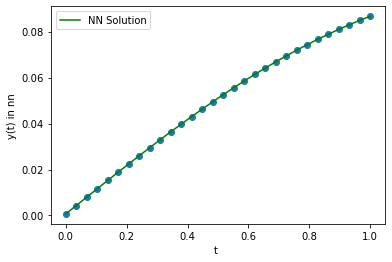

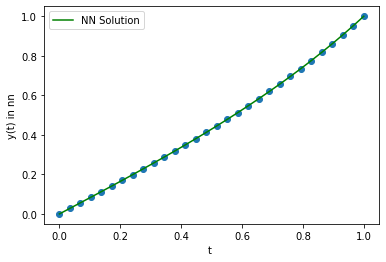

In [2]:
# Goal is to get the solution to fall between the boundary values
# Using RHS equation - mu*math.sinh(mu*y_fun)


# After analyzing - construction of epsilon1 and epsilon2 is problematic
# Appa's Solution fed to the minimizer does not minimize properly, but the plot is correct.
# My solutions are wrong plots but the eps1 and eps2 values are incorrect.
import math
import random
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

#Declaring mu
mu=1.1

#Small functions for clarity
def e_fun(b,w,t):
    return math.exp(-((w*t+b)**2))

#Functions for calculating eps1 and eps2
# At every time point, calculate for all neurons. 
def eps1(x,no_time_points,nn):  #pass guess values of X here. So directly from minimizer function
    eps1=0
    realx=x
    time_points=np.linspace(0,1,no_time_points+1)
    
    for t in time_points:
        
        #y_nn_list=[]
        #lOOPING OVER NN NEURONS FOR Y
        y_fun=0
        for i in range(0,nn):
            y_fun=y_fun+x[0]*e_fun(x[1],x[2],t)  
            if len(x)>3:
                idx_list = [0,1,2]
                x = [ele for idx, ele in enumerate(x) if idx not in idx_list]
        #print("y_fun",y_fun)
        
        #lOOPING OVER NN NEURONS FOR D2Y/DT2
        lhs=0
        for i in range(0,nn):
            #print("Input variables for eps1:", x)            
            lhs=lhs+(x[0]*x[2]**2*e_fun(x[1],x[2],t)*(-2 + 4*(x[2]*t+x[1])**2))
            if len(x)>3:
                idx_list = [0,1,2]
                x = [ele for idx, ele in enumerate(x) if idx not in idx_list]
        
        rhs = mu*math.sinh(mu*y_fun)
        diff2 = (lhs - rhs)**2   #error calculation
        #diff2 = (lhs - mu*(mu*y_fun))**2
        #y_nn_list.append(y_fun)
        x=realx
        #print("diff2",diff2)
        #print("At Time", t,":-")
        #print("eps1: ", lhs)
        eps1=eps1+diff2
    eps1=eps1/(no_time_points+1)  # Avg error over time points (equation 19 of the paper)
        
    return eps1

def eps2(x,nn):
    
    y_fun_y0=0
    y_fun_y1=0
    for i in range(0,nn):
            y_fun_y0=y_fun_y0+x[0]*e_fun(x[1],x[2],0)
            if len(x)>3:
                idx_list = [0,1,2]
                x = [ele for idx, ele in enumerate(x) if idx not in idx_list]
            #print("y_fun_y0",y_fun_y0)
    for i in range(0,nn):
            y_fun_y1=y_fun_y1+x[0]*e_fun(x[1],x[2],1)
            if len(x)>3:
                idx_list = [0,1,2]
                x = [ele for idx, ele in enumerate(x) if idx not in idx_list]
            #print("y_fun_y1",y_fun_y1)
    
            #print("Input variables for eps2:", x)
    eps2=(1/2)*((y_fun_y0)**2 + (y_fun_y1-1)**2) 
            
    return eps2
        

# Input Arguments
# X contains values of alpha, beta, and omega respectively for every neuron
def main(nn,no_time_points):
    x=[0.889729400159815,1.69867869503220, -0.969638699738544,-2.16095046568335, 1.19539301187360, 0.453917628451353,0.527620222515402,0.346605416533454,-0.274552409293548,2.16059946844531,3.09363631237436,-1.32381820255659]
    x=tuple(x)
    if len(x)!=3*nn:
        print("Incorrect number of variables!!")
    else:
        print("\neps1", eps1(x, no_time_points, nn))
        print("eps2",eps2(x,nn))    
        print("eps1+eps2:",eps1(x, no_time_points, nn)+eps2(x,nn))
        
        fun = lambda x : eps1(x,no_time_points,nn)+eps2(x,nn)
        bnds=((-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4))
        res = minimize(fun, x, bounds=bnds, method = 'SLSQP')
        return res


def plot_nn_sol(x):
    y_nn_list=[]
    nn=4
    time_points=np.linspace(0,1,timepoints)
    realx=x
    for tp in time_points:
        y_fun=0
        for i in range(0,nn):
            a=x[0]
            b=x[1]
            w=x[2]
            #print("a:",a)
            #print("b:",b)
            #print("w:",w)
            y_fun=y_fun+a*e_fun(b,w,tp)
            if len(x)>3:
                idx_list = [0,1,2]
                x = [ele for idx, ele in enumerate(x) if idx not in idx_list]
        y_nn_list.append(y_fun)
        x=realx
        # Plotting NN solution
    f1=plt.figure(1)
    #print(len(time_points))
    #print(len(y_nn_list))
    plt.scatter(time_points,y_nn_list)
    plt.plot(time_points, y_nn_list, label="NN Solution", color='green')
    #plt.plot(t, yguess, label="Guess Solution we started with")
    plt.xlabel('t ')
    plt.ylabel('y(t) in nn')
    plt.legend()
    plt.show()
        
# Global Arguments
# Arguments : nn, time points between 0-1 and 30 such points
nn=4
timepoints=30
main(nn, timepoints)
plot_nn_sol([-0.20619643,  0.69773948,  0.45570408, -0.20619643,  0.69773948,  ## My Values
        0.45570408, -0.20619643,  0.69773948,  0.45570408,  0.62849187,
        0.70775371,  0.25193396])
plot_nn_sol([0.889729400159815,1.69867869503220, -0.969638699738544,-2.16095046568335, 1.19539301187360, 0.453917628451353,0.527620222515402,0.346605416533454,-0.274552409293548,2.16059946844531,3.09363631237436,-1.32381820255659])


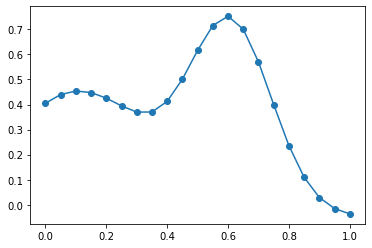

In [3]:
import matplotlib.pyplot as plt
def my_func(x,nn,time):
    t_list=[]
    y_list=[]
    eps1=0
    realx=x
    time_points=np.linspace(0,1,time+1)
    for t in time_points:
        #print("time: ",t)
        
        #lOOPING OVER NN NEURONS FOR Y
        y_fun=0
        for i in range(0,nn):
            #print(t)
            y_fun=y_fun+(x[0]*e_fun(x[1],x[2],t))
            if len(x)>3:
                idx_list = [0,1,2]
                x = [ele for idx, ele in enumerate(x) if idx not in idx_list]
       
        t_list.append(t)
        y_list.append(y_fun)
        x=realx       
        
    #print("Y_list",y_list)
    #print("t_list", t_list)
    plt.scatter(t_list,y_list)
    plt.plot(t_list,y_list)
    plt.show()
#print(len(x))
#print(x)
x_mudiff=[0.49195021783858, 0.03613145789406, -0.31916628988347, 0.41060803166618, 0.52730156513132,-3.00797291766790, -0.55024529044115, 0.85123504425867,-1.88376144935215,0.78758840332611,-3.15193861155268,5.16785920687814 , -0.49912762826986, -1.73577517883465,-4.28694087071249 , 0.39997772439985, -0.95613528078345, 1.43836302827019,-0.62116332488245, -1.10231737498492,0.66127660670523,0.18876028749915, -0.38480301484296, 1.72298784992421,-0.16564943142555, 1.11190804500174, 1.89110086745495,-0.23815862345712, -0.43648258187640, 1.10326284877928 ] 
my_func(x_mudiff,10,20)  # Input Arguments = x, nn, time grids            

In [4]:
def e_fun(b,w,t):
    return math.exp(-(w*t+b)**2)
e_fun(0,1,1)

0.36787944117144233

In [5]:
x_mudiff=[0.49195021783858, 0.03613145789406, -0.31916628988347, 0.41060803166618, 0.52730156513132,-3.00797291766790, -0.55024529044115, 0.85123504425867,-1.88376144935215,0.78758840332611,-3.15193861155268,5.16785920687814 , -0.49912762826986, -1.73577517883465,-4.28694087071249 , 0.39997772439985, -0.95613528078345, 1.43836302827019,-0.62116332488245, -1.10231737498492,0.66127660670523,0.18876028749915, -0.38480301484296, 1.72298784992421,-0.16564943142555, 1.11190804500174, 1.89110086745495,-0.23815862345712, -0.43648258187640, 1.10326284877928 ] 

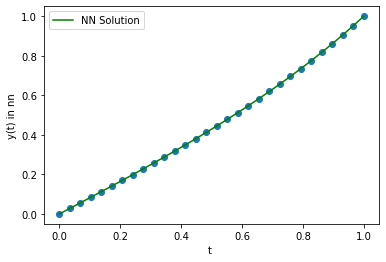

In [6]:
## testing the correct solution by plotting y(t) vs t and checking if the values lie between 0,1

#x=[0.936573221366534,1.68456033835529,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
x=[1.8025486,   1.73971395, -0.741406 ,  -2.25805049 , 1.28977868  ,0.48725711,
  0.4246056 ,  0.46866694 ,-0.16117151,  2.2762789 ,  3.26828962 ,-1.28297899]
y_nn_list=[]
nn=4
time_points=np.linspace(0,1,timepoints)
realx=x
for tp in time_points:
    y_fun=0
    for i in range(0,nn):
        a=x[0]
        b=x[1]
        w=x[2]
        #print("a:",a)
        #print("b:",b)
        #print("w:",w)
        y_fun=y_fun+a*e_fun(b,w,tp)
        if len(x)>3:
            idx_list = [0,1,2]
            x = [ele for idx, ele in enumerate(x) if idx not in idx_list]
    y_nn_list.append(y_fun)
    x=realx
    # Plotting NN solution
f1=plt.figure(1)
#print(len(time_points))
#print(len(y_nn_list))
plt.scatter(time_points,y_nn_list)
plt.plot(time_points, y_nn_list, label="NN Solution", color='green')
#plt.plot(t, yguess, label="Guess Solution we started with")
plt.xlabel('t ')
plt.ylabel('y(t) in nn')
plt.legend()
plt.show()

In [7]:
## testing the correct solution by only checking eps 1 results
from scipy.optimize import minimize
def epsiloncalc(x_guess_value, no_time_points, mu, nn):
    y_fun0=0
    y_fun1=0
    eps1=0
    realx=x_guess_value
    time_points=np.linspace(0,1,no_time_points+1)
    for t in time_points:

        #y_nn_list=[]
        #lOOPING OVER NN NEURONS FOR Y
        y_fun=0
        lhs=0
        for i in range(0,nn):
            a=x_guess_value[0]
            b=x_guess_value[1]
            w=x_guess_value[2]
            #print("a:",a)
            #print("b:",b)
            #print("w:",w)
            y_fun=y_fun+a*e_fun(b,w,t)
            lhs=lhs+(a*w**2*e_fun(b,w,t)*(-2 + 4*(w*t+b)**2))
            if len(x_guess_value)>3:
                idx_list = [0,1,2]
                x_guess_value = [ele for idx, ele in enumerate(x_guess_value) if idx not in idx_list]

        rhs = mu*math.sinh(mu*y_fun)
        diff2 = (lhs - rhs)**2   #error calculation
        #diff2 = (lhs - mu*(mu*y_fun))**2
        #y_nn_list.append(y_fun)
        x_guess_value=realx
        #print("diff2",diff2)
        #print("At Time", t,":-")
        #print("eps1: ", lhs)
        eps1=eps1+diff2
    eps1=eps1/(no_time_points+1)
    for i in range(0,nn):
        a=x_guess_value[0]
        b=x_guess_value[1]
        w=x_guess_value[2]
        #print("a:",a)
        #print("b:",b)
        #print("w:",w)
        y_fun0=y_fun0+a*e_fun(b,w,0)
        y_fun1=y_fun1+a*e_fun(b,w,1)
        if len(x_guess_value)>3:
            idx_list = [0,1,2]
            x_guess_value = [ele for idx, ele in enumerate(x_guess_value) if idx not in idx_list]
        eps2=(1/2)*((y_fun0)**2 + (y_fun1-1)**2)
    #print(eps1+eps2)
    #print("eps1 ",eps1)
    #print("eps2 ",eps2)
    return eps1+eps2
    
#Global Variable
#x_guess_value=[0.936573221366534,1.68456033835529,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
x_guess_value=[0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]
no_time_points=29
nn=4
mu=1.1

#Minimizing Section
x_guess_value=tuple(x_guess_value)
fun = lambda x : epsiloncalc(x_guess_value, no_time_points, mu, nn)
bnds=((-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4))
res = minimize(fun, x_guess_value, bounds=bnds, method = 'SLSQP')
print(res)
#epsiloncalc(x_guess_value, no_time_points, mu, nn)

     fun: 2.989089523683103
     jac: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
 message: 'Optimization terminated successfully'
    nfev: 13
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3])


In [8]:
## testing the correct solution by only checking eps 2 results
y_fun0=0
y_fun1=0
nn=4
x=[0.936573221366534,1.68456033835529,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
for i in range(0,nn):
    a=x[0]
    b=x[1]
    w=x[2]
    #print("a:",a)
    #print("b:",b)
    #print("w:",w)
    y_fun0=y_fun0+a*e_fun(b,w,0)
    y_fun1=y_fun1+a*e_fun(b,w,1)
    if len(x)>3:
        idx_list = [0,1,2]
        x = [ele for idx, ele in enumerate(x) if idx not in idx_list]
eps2=(1/2)*((y_fun0)**2 + (y_fun1-1)**2) 
print(eps2)

1.1688354396722779e-08


In [9]:
######################################################################

In [17]:
## testing the correct solution by only checking eps 1 results
from scipy.optimize import minimize
def eps1(x_guess_value, no_time_points, mu, nn):
    y_fun0=0
    y_fun1=0
    eps1=0
    realx=x_guess_value
    time_points=np.linspace(0,1,no_time_points+1)
    for t in time_points:

        #y_nn_list=[]
        #lOOPING OVER NN NEURONS FOR Y
        y_fun=0
        lhs=0
        for i in range(0,nn):
            a=x_guess_value[0]
            b=x_guess_value[1]
            w=x_guess_value[2]
            #print("a:",a)
            #print("b:",b)
            #print("w:",w)
            y_fun=y_fun+a*e_fun(b,w,t)
            lhs=lhs+(a*w**2*e_fun(b,w,t)*(-2 + 4*(w*t+b)**2))
            if len(x_guess_value)>3:
                idx_list = [0,1,2]
                x_guess_value = [ele for idx, ele in enumerate(x_guess_value) if idx not in idx_list]

        rhs = mu*math.sinh(mu*y_fun)
        diff2 = (lhs - rhs)**2   #error calculation
        #diff2 = (lhs - mu*(mu*y_fun))**2
        #y_nn_list.append(y_fun)
        x_guess_value=realx
        #print("diff2",diff2)
        #print("At Time", t,":-")
        #print("eps1: ", lhs)
        eps1=eps1+diff2
    #eps1=eps1/(no_time_points+1)
    return eps1/(no_time_points+1)
def eps2(x_guess_value, mu, nn):
    y_fun0=0
    y_fun1=0
    for i in range(0,nn):
        a=x_guess_value[0]
        b=x_guess_value[1]
        w=x_guess_value[2]
        #print("a:",a)
        #print("b:",b)
        #print("w:",w)
        y_fun0=y_fun0+a*e_fun(b,w,0)
        y_fun1=y_fun1+a*e_fun(b,w,1)
        if len(x_guess_value)>3:
            idx_list = [0,1,2]
            x_guess_value = [ele for idx, ele in enumerate(x_guess_value) if idx not in idx_list]
        #eps2=(1/2)*((y_fun0)**2 + (y_fun1-1)**2)
    #print(eps1+eps2)
    #print("eps1 ",eps1)
    #print("eps2 ",eps2)
    return (1/2)*((y_fun0)**2 + (y_fun1-1)**2)
    
#Global Variable
#x_guess_value=[0.936573221366534,1.68456033835529,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x_guess_value=[0.3,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]
#x_guess_value=[0.936573221366534,0.6,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x_guess_value=[1        ,  1.7635845 , -0.56004043, -0.83785737,  1.60147995,0.67754925, -0.83786827,  1.60143412,  0.67761739, -0.83786803,1.60143884,  0.67761236]
#x_guess_value=[1.936573221366534,1.68456033835529,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x_guess_value=[1.8025486,   1.73971395, -0.741406 ,  -2.25805049 , 1.28977868  ,0.48725711,0.4246056 ,  0.46866694 ,-0.16117151,  2.2762789 ,  3.26828962 ,-1.28297899]

x_guess_value=[1.8071326464831454, 1.7703949466392752, -0.7650858392126566, -2.256676644378014, 1.3033052613969818, 0.4852839942170539, 0.41722449851420407, 0.47058504353604785, -0.15463450364843234, 2.2798801455162834, 3.2410810564478045, -1.318692398363056]

no_time_points=29
nn=4
mu=1.1
#Printing eps1 and eps2

#Minimizing Section
x_guess_value=tuple(x_guess_value)
fun = lambda x_guess_value : eps1(x_guess_value,no_time_points, mu, nn)+eps2(x_guess_value, mu, nn)
bnds=((-7,7),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4))
res = minimize(fun, x_guess_value, bounds=bnds, method = 'SLSQP')
sol = res.x
print(list(sol))
print(res.fun)
#print(x_guess_value)
#print(eps1(x_guess_value,no_time_points, mu, nn))
#print(eps2(x_guess_value, mu, nn))
#epsiloncalc(x_guess_value, no_time_points, mu, nn)

[1.8024272288812488, 1.7402305438649304, -0.741977452594889, -2.2580935825072723, 1.29007611606214, 0.4878170014882966, 0.4244365764229374, 0.4691770506909149, -0.16107510508646117, 2.2761954927171373, 3.2698588918860367, -1.2832567830405648]
4.4203844237111434e-06


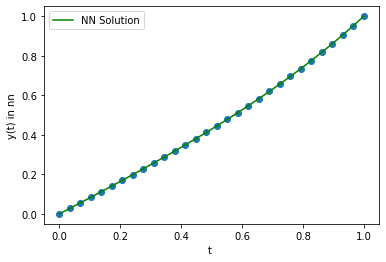

[0.00034052714722546194, 0.028461607409817933, 0.05662538684392232, 0.08486942633048271, 0.11323265295250758, 0.14175526045393017, 0.17047861516508953, 0.19944517072195994, 0.22869839529469055, 0.2582827153982776, 0.28824348066230704, 0.3186269541618839, 0.34948033302840026, 0.38085180403366703, 0.4127906386380975, 0.44534733157515033, 0.4785737863713873, 0.5125235502364744, 0.5472520994653457, 0.5828171748460091, 0.6192791645396278, 0.6567015294841949, 0.6951512635734403, 0.7346993777002078, 0.7754213932710317, 0.8173978270622645, 0.8607146453901021, 0.9054636616269977, 0.951742847262786, 0.9996565231549186]


In [18]:
## testing the correct solution by plotting y(t) vs t and checking if the values lie between 0,1

#x=[0.936573221366534,1.68456033835529,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x=[1.8025486,   1.73971395, -0.741406 ,  -2.25805049 , 1.28977868  ,0.48725711,
#  0.4246056 ,  0.46866694 ,-0.16117151,  2.2762789 ,  3.26828962 ,-1.28297899]
#mu =1.2,x=[1.8071326464831454, 1.7703949466392752, -0.7650858392126566, -2.256676644378014, 1.3033052613969818, 0.4852839942170539, 0.41722449851420407, 0.47058504353604785, -0.15463450364843234, 2.2798801455162834, 3.2410810564478045, -1.318692398363056]
x=[1.8024272288812488, 1.7402305438649304, -0.741977452594889, -2.2580935825072723, 1.29007611606214, 0.4878170014882966, 0.4244365764229374, 0.4691770506909149, -0.16107510508646117, 2.2761954927171373, 3.2698588918860367, -1.2832567830405648]
y_nn_list=[]
nn=4
time_points=np.linspace(0,1,timepoints)
realx=x
for tp in time_points:
    y_fun=0
    for i in range(0,nn):
        a=x[0]
        b=x[1]
        w=x[2]
        #print("a:",a)
        #print("b:",b)
        #print("w:",w)
        y_fun=y_fun+a*e_fun(b,w,tp)
        if len(x)>3:
            idx_list = [0,1,2]
            x = [ele for idx, ele in enumerate(x) if idx not in idx_list]
    y_nn_list.append(y_fun)
    x=realx
    # Plotting NN solution
f1=plt.figure(1)
#print(len(time_points))
#print(len(y_nn_list))
plt.scatter(time_point,y_nn_list)
plt.plot(time_points, y_nn_list, label="NN Solution", color='green')
#plt.plot(t, yguess, label="Guess Solution we started with")
plt.xlabel('t ')
plt.ylabel('y(t) in nn')
plt.legend()
plt.show()
print(y_nn_list)

In [12]:
def f1(x):
    return (1-x[0])**2
def f2(x):
    return 100*(x[1]-x[0]**2)**2
x=[0.5,0.5]
x=tuple(x)
fun = lambda x : f1(x)+f2(x)
#fun = lambda x : (1-x[0])**2+100*(x[1]-x[0]**2)**2
#bnds=((-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4))
res = minimize(fun, x, method = 'SLSQP')
print(res)

     fun: 5.7861963153837175e-08
     jac: array([-0.00945007,  0.00467212])
 message: 'Optimization terminated successfully'
    nfev: 55
     nit: 16
    njev: 16
  status: 0
 success: True
       x: array([0.99994234, 0.99990803])
